Split our Data

In [26]:
!pip install split-folders

In [27]:
import splitfolders

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
input_folder ='/content/drive/MyDrive/DATASET-Car/'

In [29]:
splitfolders.ratio(input_folder, output="/content/drive/MyDrive/DATASET",seed=42, ratio=(.7,.2,.1), group_prefix=None)

Copying files: 2236 files [03:39, 10.20 files/s]


Importation Des Biblio

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import cv2
import os
import tensorflow as tf
#import shap
import seaborn as sns
from sklearn import preprocessing
import tensorflow.keras.layers as tfl
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [15]:
from os import walk
for (dirpath, dirnames, filenames) in walk(r'/content/drive/MyDrive/DATASET'):
    print("Directory path: ", dirpath)

Directory path:  /content/drive/MyDrive/DATASET
Directory path:  /content/drive/MyDrive/DATASET/train
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Passat
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Polo
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Golf
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Beetle
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Tiguan
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Arteon
Directory path:  /content/drive/MyDrive/DATASET/train/Volkswagen_Atlas
Directory path:  /content/drive/MyDrive/DATASET/val
Directory path:  /content/drive/MyDrive/DATASET/val/Volkswagen_Jetta
Directory path:  /content/drive/MyDrive/DATASET/val/Volkswagen_Passat
Directory path:  /content/drive/MyDrive/DATASET/val/Volkswagen_Polo
Directory path:  /content/drive/MyDrive/DATASET/val/Volkswagen_Golf
D

In [16]:
!tree content/drive/MyDrive/DATASET /A

/bin/bash: line 1: tree: command not found


In [17]:
train_path = r'/content/drive/MyDrive/DATASET/train'
test_path = r'/content/drive/MyDrive/DATASET/test'
dataset_path = r'/content/drive/MyDrive/DATASET'

### Data Preprocessing

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
data_dir = r'/content/drive/MyDrive/DATASET/train'
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2012_16_15_110_20_4_70_57_182_24_FWD_5_4_4dr_hJo.jpg
Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2011_16_15_110_20_4_70_57_182_23_FWD_5_4_4dr_NtH.jpg
Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2013_16_15_110_20_4_70_57_182_24_FWD_5_4_4dr_rDX.jpg
Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2011_16_15_110_20_4_70_57_182_23_FWD_5_4_4dr_VyQ.jpg
Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2014_21_16_170_18_4_70_57_182_25_FWD_5_4_4dr_LAC.jpg
Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2020_23_17_140_14_4_70_57_185_nan_FWD_5_4_4dr_KZE.jpg
Issue with image /content/drive/MyDrive/DATASET/train/Volkswagen_Jetta/Volkswagen_Jetta_2014_21_16_170_18_4_70_57_182_25_FWD_5_4_4dr_FLE.jpg
Issue with i

#####In summary, Histogram Equalization (HE) is a technique used to improve the contrast of images. However, applying HE directly to the individual color channels of an RGB image can lead to unnatural-looking images that lose color information. To preserve color information, we need to separate the brightness component from the color component and apply HE only to the brightness component. This can be achieved by converting the RGB color space to other color spaces such as YCbCr or HSV, which separate brightness from color information. After applying HE to the brightness component, we can merge it back with the original color channels to get the final color image.

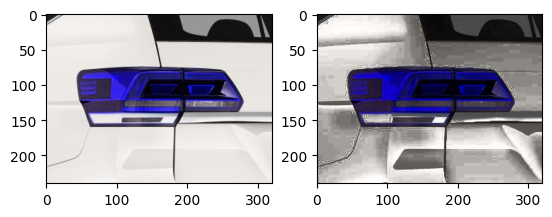

In [20]:
bgr_img = cv2.imread(train_path+'/Volkswagen_Atlas/Volkswagen_Atlas_2019_30_18_230_20_4_78_70_198_22_FWD_7_4_SUV_AJM.jpg')


# convert from BGR color-space to YCrCb
ycrcb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2YCrCb)
# equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
# convert back to BGR color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

plt.subplot(121),plt.imshow(bgr_img)

plt.subplot(122),plt.imshow(equalized_img)
plt.show()

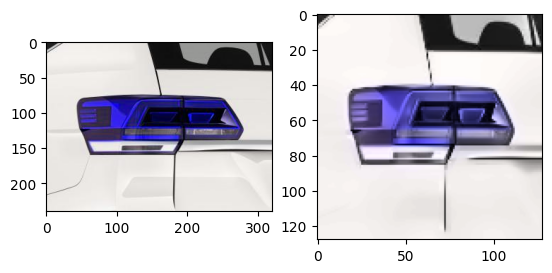

In [21]:
bgr_img = cv2.imread(train_path+'/Volkswagen_Atlas/Volkswagen_Atlas_2019_30_18_230_20_4_78_70_198_22_FWD_7_4_SUV_AJM.jpg')
# dsize
dsize = (128,128)
resized_image = cv2.resize(bgr_img,dsize)
# convert from BGR color-space to YCrCb
ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
# create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# Now apply on the YCrCb image
ycrcb_img[:, :, 0] = clahe.apply(ycrcb_img[:, :, 0])
# convert back to BGR color-space from YCrCb
equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)

# Denoise is done to remove unwanted noise to better perform
equalized_denoised_image = cv2.fastNlMeansDenoisingColored(equalized_img, None, 10, 10, 7, 21)

plt.subplot(121),plt.imshow(bgr_img)
plt.subplot(122),plt.imshow(equalized_denoised_image)
plt.show()


#####In this modified function, we apply thresholding to the denoised and equalized image
#####to set all pixels with a value below 200 to white. The result is a white background with the object in the foreground. We then
#####use cv2.bitwise_and() to combine the original image with the thresholded image to create a new image with a white background.

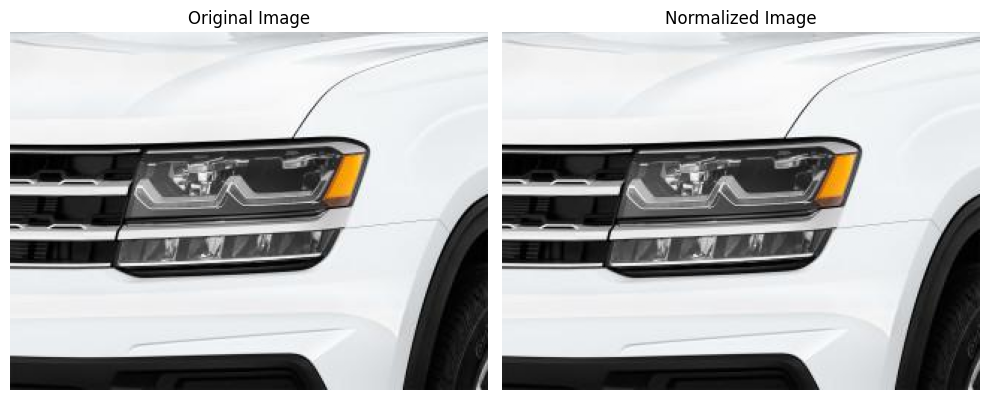

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def normalize_image(image):
    # Ensure image is a float32 data type (required for division)
    image = image.astype(np.float32)

    # Normalize image to [0, 1]
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)

    return normalized_image

# Load an image using OpenCV (replace 'path/to/your/image.jpg' with the actual image path)
image_path = '/content/drive/MyDrive/DATASET/train/Volkswagen_Atlas/Volkswagen_Atlas_2019_30_18_230_20_4_78_70_198_22_FWD_7_4_SUV_GoL.jpg'
bgr_img = cv2.imread(image_path)

# Convert the BGR image to RGB format (if needed)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# Normalize the image
normalized_img = normalize_image(rgb_img)

# Optionally, convert the image back to BGR format for further processing (if needed)
bgr_normalized_img = cv2.cvtColor(normalized_img, cv2.COLOR_RGB2BGR)

# Display the original and normalized images side by side using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rgb_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img)
plt.title('Normalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

def preprocess_images(dataset_path):
    images_data = []
    images_label = []
    class_names = os.listdir(dataset_path)
    for class_name in class_names:
        images_path = dataset_path + '/' + class_name
        #images_path ='/content/drive/MyDrive/DATASET/train/Volkswagen_Atlas'
        images = os.listdir(images_path)
        for image in images:
            bgr_img = cv2.imread(images_path + '/' + image)
            # dsize
            dsize = (64,64)
            #resize image
            resized_image = cv2.resize(bgr_img,dsize)
            # normalize the image
            #normalized_image = normalize_image(resized_image)
            # convert from BGR color-space to YCrCb pr la correction de la lumière to red and blue
            ycrcb_img = cv2.cvtColor(resized_image, cv2.COLOR_BGR2YCrCb)
            # create a CLAHE object
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
            # Now apply CLAHE object on the YCrCb image
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            ycrcb_img[:, :, 0] = clahe.apply(ycrcb_img[:, :, 0])
            # convert back to BGR color-space from YCrCb
            equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
            # Denoise is done to remove unwanted noise to better perform
            equalized_denoised_image = cv2.fastNlMeansDenoisingColored(equalized_img, None, 10, 10, 7, 21)

            # Make the background white
            gray = cv2.cvtColor(equalized_denoised_image, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            background = np.ones_like(equalized_denoised_image) * 255
            background[thresh == 255] = equalized_denoised_image[thresh == 255]
            equalized_denoised_image = background

            images_data.append(equalized_denoised_image/255)
            images_label.append(class_name)
    #pour pouvoir les utiliser dans des opérations mathématiques et de traitement d'image ultérieures plus facilement et efficacement.
    images_data = np.array(images_data)
    #images_label = np.array(images_label)
    return images_data #, images_label

def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.show()




In [24]:
train_images_data = preprocess_images(train_path)



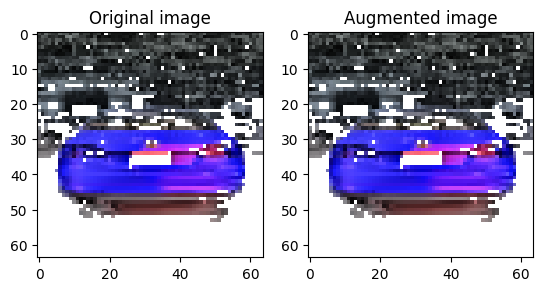

In [25]:
# Visualize the first image in the dataset
visualize(train_images_data[0], train_images_data[0])